In [3]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [11]:
def freq_bigram_by_year(year):
    abstracts_full = pd.read_csv("abstracts_ed_06112018.txt", sep="\t")
    
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    #retirar a lematization, 16S é removido
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
    
    #bigramas aqui
    bigramFinder_year = nltk.collocations.BigramCollocationFinder.from_words(lemmatized_year)
    bigram_freq_year = bigramFinder_year.ngram_fd.items()
    bigramFreqTable_year = pd.DataFrame(list(bigram_freq_year), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    bigramFreqTable_year.to_csv("{}_bigram_freq.csv".format(year))
 

In [12]:
for i in range(2001,2019):
    freq_bigram_by_year(i)

In [17]:
abstracts = pd.read_csv("abstracts_ed_06112018.txt", sep="\t")
abstracts_all = abstracts["Abstract"]
abstracts_all_cat = abstracts_all.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_all_no_punct = abstracts_all_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_all_no_punct.lower()) 
  
filtered_sentence_all = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence_all.append(w)    

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_all = []

for w in filtered_sentence_all:
    lemmatized_w = wordnet_lemmatizer.lemmatize(w)
    lemmatized_all.append(lemmatized_w)
        
bigramFinder_all = nltk.collocations.BigramCollocationFinder.from_words(lemmatized_all)
bigram_freq_all = bigramFinder_all.ngram_fd.items()
bigramFreqTable_all = pd.DataFrame(list(bigram_freq_all), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

bigramFreqTable_all

,bigram,freq
30,"(type, strain)",13636
20,"(16, rrna)",12931
21,"(rrna, gene)",12313
22,"(gene, sequence)",11706
139,"(sp, nov)",10445
58,"(fatty, acid)",8092
132,"(novel, specie)",7973
228,"(specie, genus)",6752
257,"(sequence, similarity)",6717
140,"(nov, proposed)",6495


In [25]:
n_year = pd.DataFrame(abstracts["Year"].value_counts()).reset_index()
n_year


,index,Year
0,2017,938
1,2015,928
2,2013,874
3,2016,839
4,2014,777
5,2018,578
6,2012,561
7,2011,535
8,2009,516
9,2010,515


In [24]:
#nº de itens por ano
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Frequency,156,228,256,320,370,400,504,451,516,515,535,561,874,777,928,839,938,578


In [19]:
bigramFreqTable_2001 = pd.read_table('2001_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2002 = pd.read_table('2002_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2003 = pd.read_table('2003_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2004 = pd.read_table('2004_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2005 = pd.read_table('2005_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2006 = pd.read_table('2006_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2007 = pd.read_table('2007_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2008 = pd.read_table('2008_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2009 = pd.read_table('2009_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2010 = pd.read_table('2010_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2011 = pd.read_table('2011_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2012 = pd.read_table('2012_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2013 = pd.read_table('2013_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2014 = pd.read_table('2014_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2015 = pd.read_table('2015_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2016 = pd.read_table('2016_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2017 = pd.read_table('2017_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2018 = pd.read_table('2018_bigram_freq.csv', sep=',', index_col=0)

dfs = [bigramFreqTable_2001, bigramFreqTable_2002, bigramFreqTable_2003, bigramFreqTable_2004, bigramFreqTable_2005, bigramFreqTable_2006, bigramFreqTable_2007, bigramFreqTable_2008, bigramFreqTable_2009, bigramFreqTable_2010, bigramFreqTable_2011, bigramFreqTable_2012, bigramFreqTable_2013, bigramFreqTable_2014, bigramFreqTable_2015, bigramFreqTable_2016, bigramFreqTable_2017, bigramFreqTable_2018]
from functools import reduce

In [20]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='bigram'), dfs)
df_final.columns = ["bigram", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]

In [21]:
df_final = df_final.set_index("bigram")

In [22]:
df_final.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
bigram,,,,,,,,,,,,,,,,,,
"('type', 'strain')",173,268,269,392,469,548,700,688,808,762,740,803,1288,1192,1358,1176,1248,754
"('sp', 'nov')",155,224,236,374,413,469,577,509,601,565,577,616,919,821,966,877,965,581
"('new', 'specie')",89,55,52,39,35,31,28,16,18,24,27,25,30,26,43,40,56,51


In [26]:
relative = df_final.div(n_year_transposed.iloc[0])

In [30]:
transposed_relative = relative.T
transposed_relative

bigram,"('type', 'strain')","('sp', 'nov')","('new', 'specie')","('16', 'rrna')","('degree', 'c')","('fatty', 'acid')","('gc', 'content')","('dna-dna', 'hybridization')","('nov', 'type')","('nov', 'proposed')",...,"('tween', '80')","('specie', 'phylogenetic')","('sequence', 'study')","('chemotaxonomic', 'characterization')","('considered', 'represent')","('transcribed', 'spacer')","('profile', 'contained')","('similarity', 'dna-dna')","('isolates', 'grew')","('short', 'rod')"
2001,1.108974,0.993590,0.570513,0.480769,0.442308,0.416667,0.410256,0.371795,0.358974,0.339744,...,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410
2002,1.175439,0.982456,0.241228,0.592105,0.552632,0.530702,0.399123,0.359649,0.368421,0.359649,...,0.026316,0.013158,0.004386,0.004386,0.008772,0.017544,0.004386,0.013158,0.008772,0.008772
2003,1.050781,0.921875,0.203125,0.574219,0.632812,0.589844,0.242188,0.320312,0.289062,0.332031,...,0.003906,0.003906,0.003906,0.003906,0.003906,0.003906,0.003906,0.023438,0.011719,0.035156
2004,1.225000,1.168750,0.121875,1.015625,0.412500,0.584375,0.384375,0.325000,0.353125,0.421875,...,0.012500,0.021875,0.009375,0.003125,0.009375,0.021875,0.003125,0.015625,0.015625,0.015625
2005,1.267568,1.116216,0.094595,1.327027,0.486486,0.721622,0.508108,0.356757,0.348649,0.502703,...,0.021622,0.005405,0.005405,0.002703,0.029730,0.010811,0.005405,0.021622,0.018919,0.021622
2006,1.370000,1.172500,0.077500,1.432500,0.500000,0.677500,0.560000,0.332500,0.387500,0.612500,...,0.005000,0.010000,0.012500,0.002500,0.030000,0.012500,0.002500,0.020000,0.015000,0.020000
2007,1.388889,1.144841,0.055556,1.440476,0.529762,0.831349,0.640873,0.295635,0.253968,0.654762,...,0.003968,0.007937,0.001984,0.005952,0.055556,0.003968,0.003968,0.015873,0.003968,0.023810
2008,1.525499,1.128603,0.035477,1.470067,0.600887,0.773836,0.636364,0.334812,0.290466,0.705100,...,0.006652,0.011086,0.006652,0.004435,0.104213,0.008869,0.004435,0.006652,0.008869,0.039911
2009,1.565891,1.164729,0.034884,1.439922,0.581395,0.773256,0.635659,0.337209,0.317829,0.715116,...,0.011628,0.015504,0.013566,0.001938,0.133721,0.017442,0.003876,0.015504,0.001938,0.011628
2010,1.479612,1.097087,0.046602,1.458252,0.596117,0.848544,0.660194,0.273786,0.314563,0.679612,...,0.005825,0.005825,0.007767,0.003883,0.147573,0.001942,0.005825,0.019417,0.003883,0.021359


In [31]:
new_specie = transposed_relative["('sp', 'nov')"]
new_specie.index.name = 'year'
new_specie = new_specie.reset_index()
new_specie.columns = ["year", "freq"]
new_specie.columns

Index(['year', 'freq'], dtype='object')

In [32]:
new_genus = transposed_relative["('gen', 'nov')"]
new_genus.index.name = 'year'
new_genus = new_genus.reset_index()
new_genus.columns = ["year", "freq"]
new_genus.columns

Index(['year', 'freq'], dtype='object')

In [34]:
s16_rrna = transposed_relative["('16', 'rrna')"]
s16_rrna.index.name = 'year'
s16_rrna = s16_rrna.reset_index()
s16_rrna.columns = ["year", "freq"]
s16_rrna.columns

Index(['year', 'freq'], dtype='object')

In [35]:
fatty_acid = transposed_relative["('fatty', 'acid')"]
fatty_acid.index.name = 'year'
fatty_acid = fatty_acid.reset_index()
fatty_acid.columns = ["year", "freq"]
fatty_acid.columns

Index(['year', 'freq'], dtype='object')

In [36]:
gc_content = transposed_relative["('gc', 'content')"]
gc_content.index.name = 'year'
gc_content = gc_content.reset_index()
gc_content.columns = ["year", "freq"]
gc_content.columns

Index(['year', 'freq'], dtype='object')

In [37]:
phylogenetic_analysis = transposed_relative["('phylogenetic', 'analysis')"]
phylogenetic_analysis.index.name = 'year'
phylogenetic_analysis = phylogenetic_analysis.reset_index()
phylogenetic_analysis.columns = ["year", "freq"]
phylogenetic_analysis.columns

Index(['year', 'freq'], dtype='object')

In [38]:
polar_lipid = transposed_relative["('polar', 'lipid')"]
polar_lipid.index.name = 'year'
polar_lipid = polar_lipid.reset_index()
polar_lipid.columns = ["year", "freq"]
polar_lipid.columns

Index(['year', 'freq'], dtype='object')

In [39]:
dna_hybridization = transposed_relative["('dna-dna', 'hybridization')"]
dna_hybridization.index.name = 'year'
dna_hybridization = dna_hybridization.reset_index()
dna_hybridization.columns = ["year", "freq"]
dna_hybridization.columns

Index(['year', 'freq'], dtype='object')

In [40]:
respiratory_quinone = transposed_relative["('respiratory', 'quinone')"]
respiratory_quinone.index.name = 'year'
respiratory_quinone = respiratory_quinone.reset_index()
respiratory_quinone.columns = ["year", "freq"]
respiratory_quinone.columns

Index(['year', 'freq'], dtype='object')

Text(0.91,0.31,'respiratory quinone')

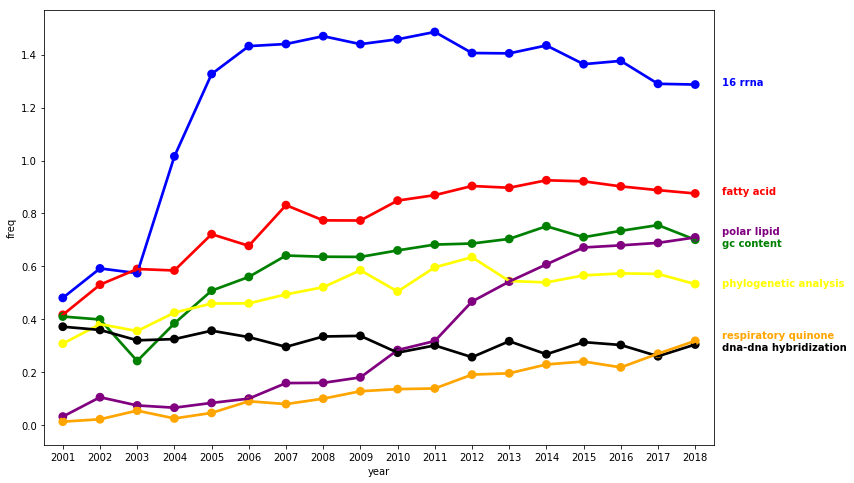

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(x="year", y="freq", data=s16_rrna, color="blue")
fig.text(x = 0.91, y = 0.75, s = "16 rrna", weight = "bold", color="blue")
sns.pointplot(x="year", y="freq", data=fatty_acid, color="red")
fig.text(x = 0.91, y = 0.56, s = "fatty acid", weight = "bold", color="red")
sns.pointplot(x="year", y="freq", data=gc_content, color="green")
fig.text(x = 0.91, y = 0.47, s = "gc content", weight = "bold", color="green")
sns.pointplot(x="year", y="freq", data=phylogenetic_analysis, color="yellow")
fig.text(x = 0.91, y = 0.40, s = "phylogenetic analysis", weight = "bold", color="yellow")
sns.pointplot(x="year", y="freq", data=polar_lipid, color="purple")
fig.text(x = 0.91, y = 0.49, s = "polar lipid", weight = "bold", color="purple")
sns.pointplot(x="year", y="freq", data=dna_hybridization, color="black")
fig.text(x = 0.91, y = 0.29, s = "dna-dna hybridization", weight = "bold", color="black")
sns.pointplot(x="year", y="freq", data=respiratory_quinone, color="orange")
fig.text(x = 0.91, y = 0.31, s = "respiratory quinone", weight = "bold", color="orange")
